In [45]:
import os
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import time

In [46]:
csvpath=os.path.join("..","Resources","MovieData_Clean.csv")
movie_df=pd.read_csv(csvpath)
movie_df.count()

TMDB ID               3319
Title                 3319
Release Date          3319
Budget                3319
Revenue               3319
IMDB ID               3319
Rating                3128
Runtime               3297
Genre                 3316
Director              3313
Writer                3222
Actors                3301
Plot                  3294
Language              3308
Country               3317
Awards                2799
Poster                3286
IMDB Rating           3285
IMDB Votes            3285
DVD Release Date      2848
Production            3035
Day of Release        3319
Month of Release      3319
Year of Release       3319
Revenue (Millions)    3319
dtype: int64

In [47]:
grouped_movie_df=movie_df.groupby(["Year of Release"]).count()
grouped_movie_df

,TMDB ID,Title,Release Date,Budget,Revenue,IMDB ID,Rating,Runtime,Genre,Director,...,Country,Awards,Poster,IMDB Rating,IMDB Votes,DVD Release Date,Production,Day of Release,Month of Release,Revenue (Millions)
Year of Release,,,,,,,,,,,,,,,,,,,,,
2008,257,257,257,257,257,257,245,254,257,257,...,257,208,256,257,257,241,243,257,257,257
2009,285,285,285,285,285,285,260,282,284,284,...,285,222,282,282,282,261,265,285,285,285
2010,282,282,282,282,282,282,260,282,282,282,...,282,242,281,281,281,257,267,282,282,282
2011,313,313,313,313,313,313,298,313,313,313,...,313,267,312,312,312,289,299,313,313,313
2012,273,273,273,273,273,273,260,270,273,273,...,273,227,269,268,268,249,258,273,273,273
2013,318,318,318,318,318,318,306,317,318,317,...,318,280,316,317,317,285,307,318,318,318
2014,328,328,328,328,328,328,313,326,328,328,...,328,279,323,325,325,284,308,328,328,328
2015,316,316,316,316,316,316,298,314,316,315,...,315,266,311,310,310,261,279,316,316,316
2016,294,294,294,294,294,294,281,293,294,294,...,294,256,290,291,291,234,250,294,294,294


In [48]:
# Setting up my boxplot data

boxes={}
year=2008
while year<=2019:
    boxes[str(year)]=movie_df.loc[movie_df["Year of Release"]==year]["Revenue (Millions)"]
    year=year+1
boxes["2013"]


1410     59.520298
1411      8.100000
1412     60.141683
1413    105.200903
1414     19.701164
           ...    
1723     44.907260
1724      1.234254
1725    392.000694
1726     74.188937
1727     20.275812
Name: Revenue (Millions), Length: 318, dtype: float64

In [77]:
#Calculating IQRs
q1, q3= np.percentile(boxes["2019"],[25,75])
iqr=q3-q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
(boxes["2019"]>upper_bound).value_counts()

False    127
True      18
Name: Revenue (Millions), dtype: int64

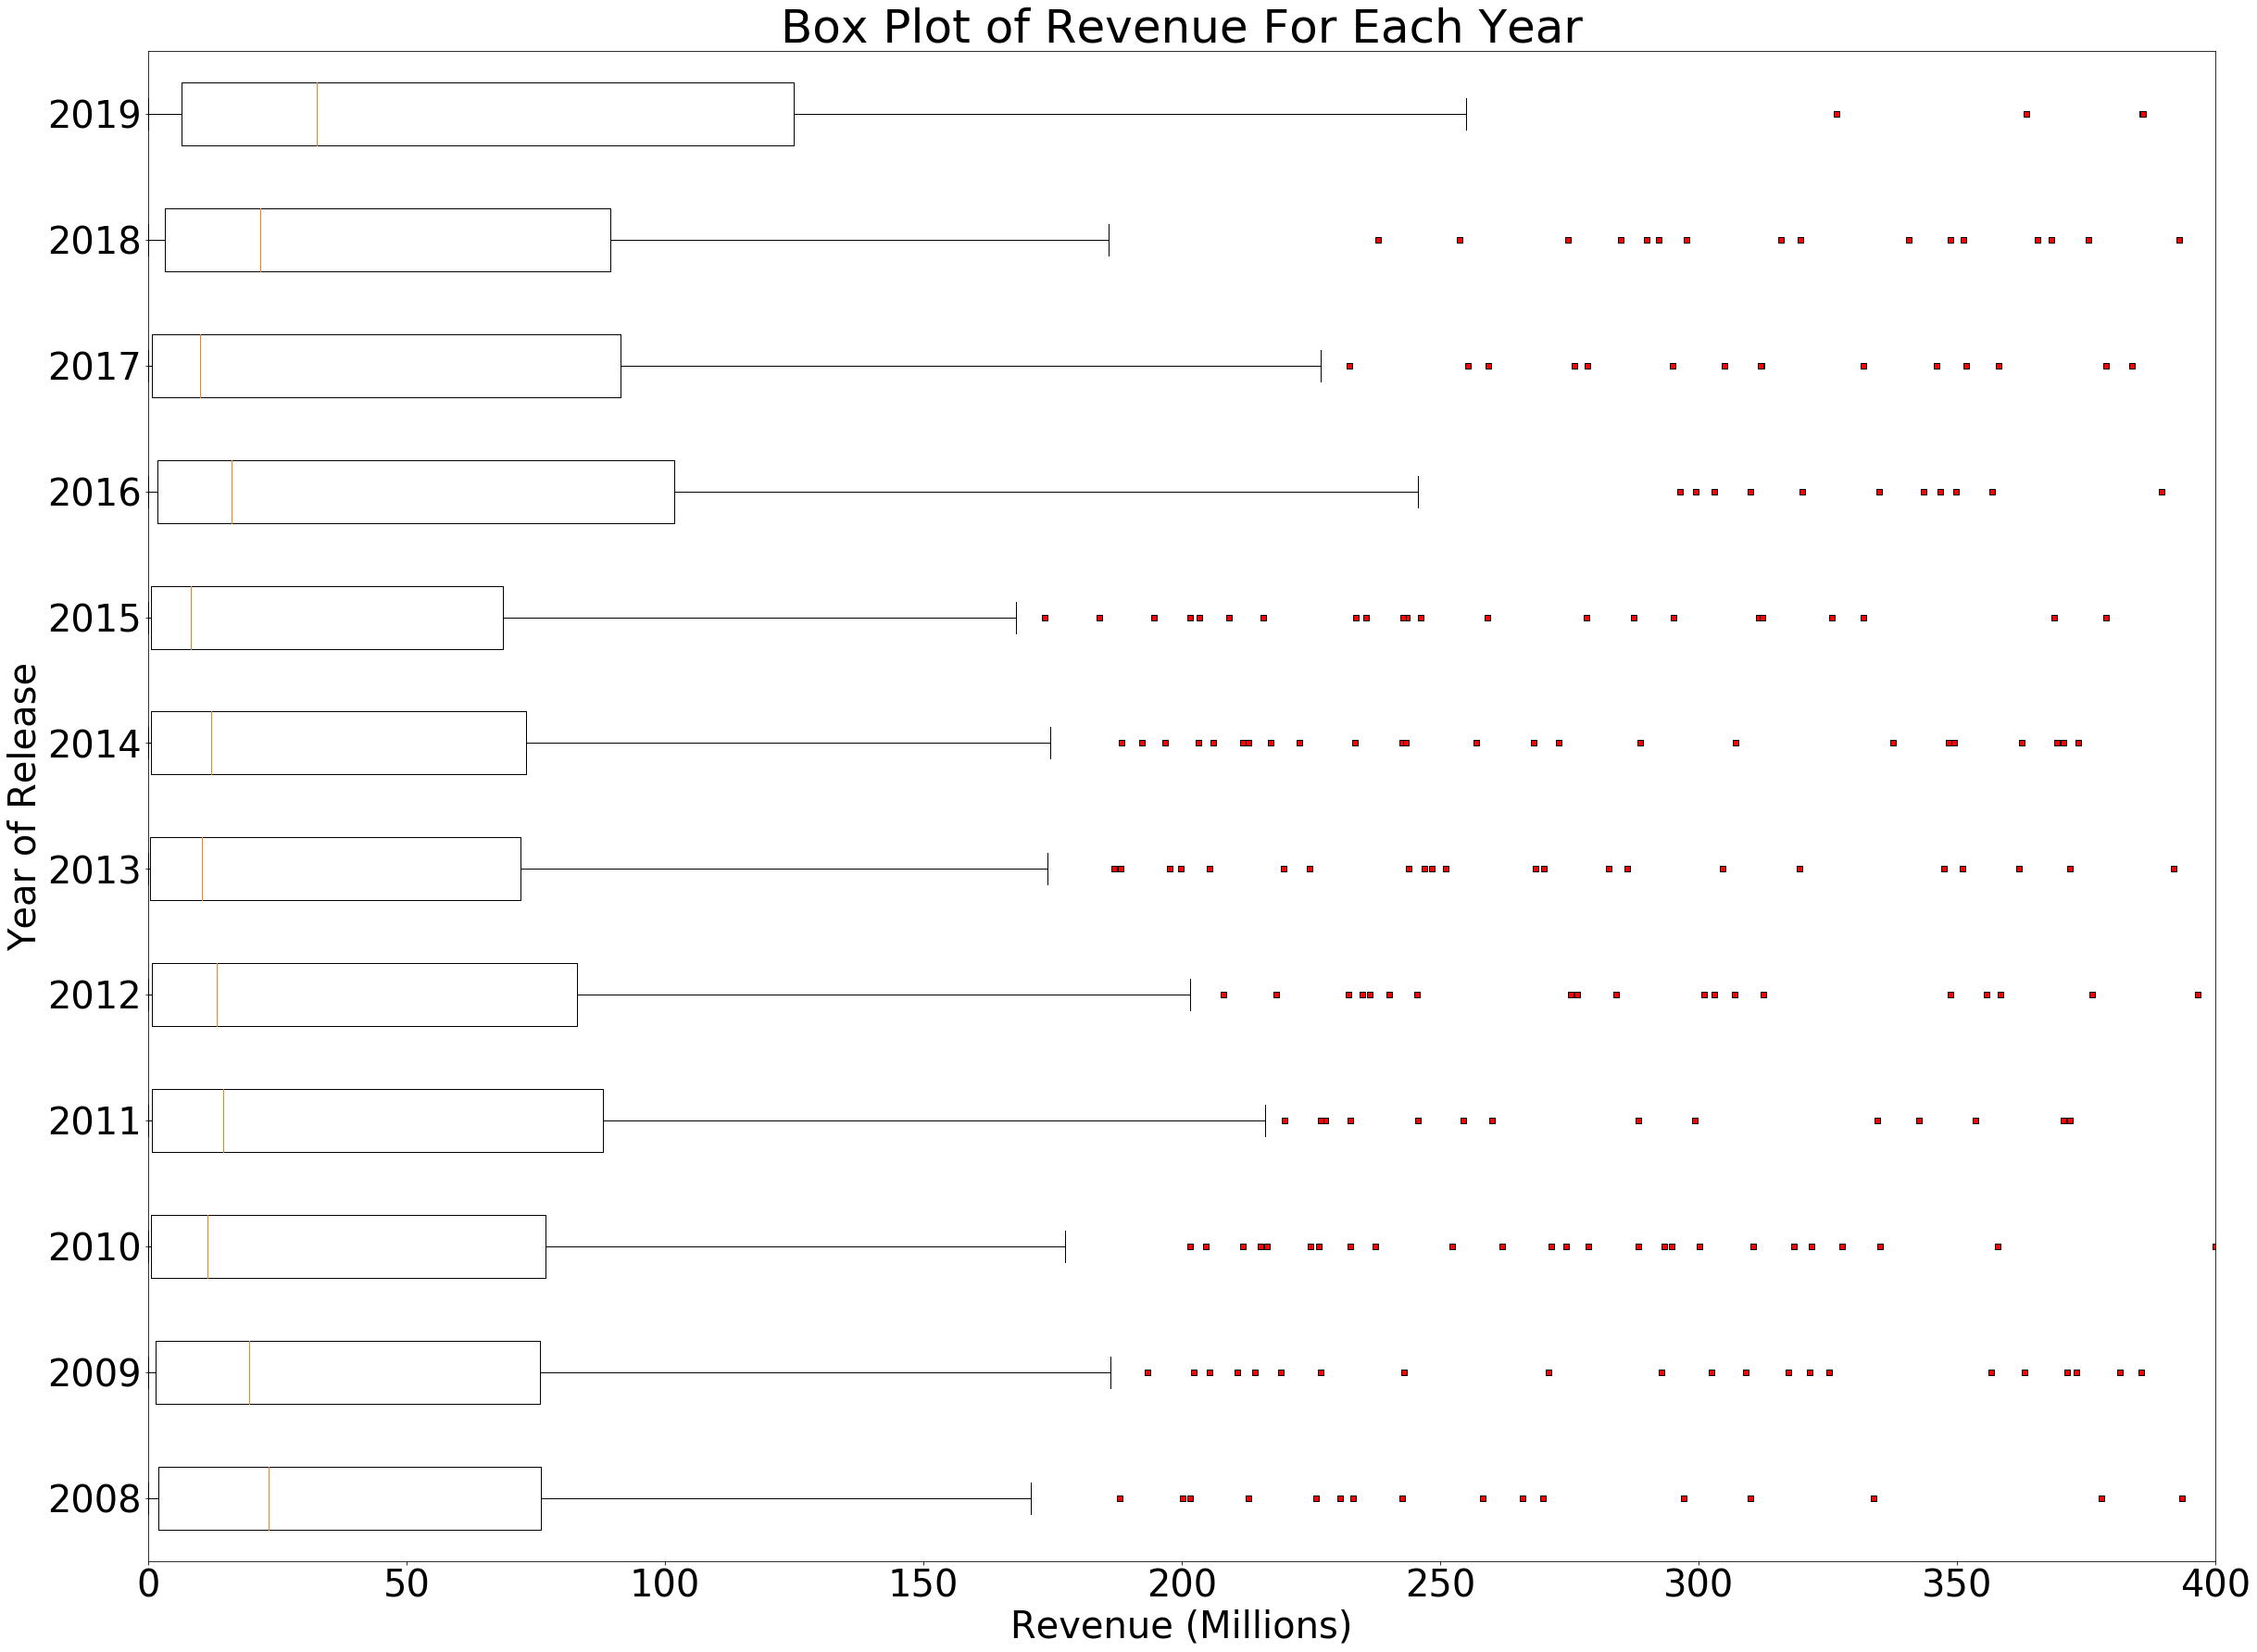

In [85]:
fig, ax = plt.subplots(figsize=(40,30))
ax.boxplot(boxes.values(),showfliers=True,flierprops={"markerfacecolor":'r', "marker":'s'},vert=False)
ax.set_yticklabels(boxes.keys(), fontsize=40)
plt.setp(ax.get_xticklabels(),fontsize=40)
plt.ylabel("Year of Release",fontsize=40)
plt.xlabel("Revenue (Millions)",fontsize=40)
plt.xlim(0,400)
plt.title("Box Plot of Revenue For Each Year",fontsize=50)
plt.show()

In [86]:
imagepath=os.path.join("..","Images","BoxPlot_AnnualRevenues.png")
fig.savefig(imagepath)